# Pandas Intro
The first step is to complete [this great tutorial](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/) which will introduce you to the wonderful data manipulation package called [Pandas](https://pandas.pydata.org/).

A few comments/modifications to the tutorial:
*   You do **not** need to install pandas if you use Google Colab, just `import pandas as pd` and you're good to go.
*   Using Google Colab can make file input/output somewhat annoying so feel free to skip the *How to read in data* section
*   To import the `IMDB-Movie-Data.csv` data set, use the following code: 
```
url = "https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv"
df = pd.read_csv(url)
```




# Homemade Expansion on Pandas Intro
Below are some homemade tutorials that expand on the skills you learned in the **Learn Data Science** tutorial. Try these after you've completed the tutorial above.

## Which movie genres tend to have the highest/lowest success on IMDB?
We will answer this question using 3 different measures of success: **metascore**, **rating**, and **revenue**. We provide some guidelines on how to answer this question below.

In [2]:
###################
### Walkthrough ###
###################

### First, we calculate the mean and standard deviation metascore/rating/revenue 
### of movies with each genre tag

# Import the following packages: 
    # numpy (as np), pandas (as pd), matplotlib.pyplot (as plt)

# Make sure you've imported the IMDB-Movie-Data.csv file and created a dataframe with it
    # Use the same code from above where we import the data directly from github

# Obtain a list of all *unique* genres which are present in the data set
    # Extract the genres column (this is a list of lists) 
        # Hint: df['column_name'] 
    # Flatten this data into a list of strings (those strings being genres)
        # Hint: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
    # Cast the list as a set to get rid of the duplicates
    # Cast the set back into a list so we can iterate on it

# For each genre
    # extract all entries (using conditional selection) for movies in that genre
    # Calculate the mean and stdev of metascore, rating, and revenue for that genre
        # Hint: use np.mean (https://numpy.org/doc/stable/reference/generated/numpy.mean.html), 
        #       and np.std,(https://numpy.org/doc/stable/reference/generated/numpy.std.html)
    # Hint: See example 6 of https://www.programiz.com/python-programming/list-comprehension
    # Hint: Use an f-string to name the column in df https://realpython.com/python-f-strings/#f-strings-a-new-and-improved-way-to-format-strings-in-python

# Conglomerate this data in another dataframe, as shown below
#   genre  | mean_metascore | mean_rating | mean_revenue | std_metascore |...
#   -------|----------------|-------------|------------------------------|...
#   Horror | 55.2           | 6.8         | 227.7        | 4.5           |...
#   ...


# Now for each measure of success (mean_metascore, mean_rating, mean_revenue),
    # Sort the dataset by that column
    # Create a scatter plot of genre (x) vs measure of success (y) with the standard deviation plotted as error bars    
      # Hint: use plt.errorbar

# What kinds of surprising discoveries or interesting conclusions can you glean from these plots?

# Now we want to know if these three measures of success correlate with each
# other. To figure that out, we're going to make scatterplots comparing the 
# revenue, ratings, and metascore of every movie in the dataset, e.g., ratings vs revenue --> Do highly rated movies make more money? 
    # Hint: > Use plt.scatter (https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)
    #       > Use the plt.scatter alpha argument (alpha=0.2) to make the points 
    #         transparent so you can see the distribution more clearly
    # Fit a linear trend line with np.polyfit (https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

# Solutions

In [18]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the IMDB movie data set
url = "https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv"
df = pd.read_csv(url)

# Create a more useful genre column with list of genres applicable to each movie 
# rather than single string containing all the genres for a given movie.
genre_groups = [str.split(entry, sep=',') for entry in df.Genre]
df['genre_groups'] = genre_groups

# Create a list of all the unique genres present in the data set 
genre_set = set() # we build it in a set because sets automatically discard duplicate entries
for genre_group in genre_groups:
    for genre in genre_group:
        genre_set.add(genre)
genre_list = list(genre_set)

# (for convenience of the next step) Create columns in the dataframe which 
# indicate whether a movie belongs in a given genre 
for genre in genre_list:
    df[f'is_{genre}'] = [genre in group for group in df['genre_groups']]

# Now when we want all the movies that can be described as Action (even if they 
# are also described by other genres as well), we just use the following
df[df['is_Action'] == True]

# Now we can calculate and compile the desired statistics (mean, std dev) for each genre
# We will again loop through each unique genre and at each iteration:
    # Extract all movies with that genres (use the 'is_Genre' columns we just created)
    # Calculate the mean and stdev of ratings, revenue, and metascore
    # Add these values to the dictionary as a list using my_dict.update({key : value})
        # where the key is the genre and the value is a list of the means and stdevs
  
stat_dict = {}

for genre in genre_list:
  column = df[df[f"is_{genre}"]]
  mean_rating = np.mean(column['Rating'])
  deviation_rating = np.std(column['Rating'])
  mean_revenue = np.mean(column['Revenue (Millions)'])
  deviation_revenue = np.std(column['Revenue (Millions)'])
  mean_metascore = np.mean(column['Metascore'])
  deviation_metascore = np.std(column['Metascore'])
  stat_dict.update({genre:[mean_rating,deviation_rating,mean_revenue,deviation_revenue,mean_metascore,deviation_metascore]})

# Convert this dictionary into a dataframe
stat_df = pd.DataFrame.from_dict(stat_dict, orient='index', columns=['mean_rating','deviation_rating','mean_revenue','deviation_revenue','mean_metascore','deviation_metascore']).sort_values(by='mean_rating', ascending=False)b

,mean_rating,deviation_rating,mean_revenue,deviation_revenue,mean_metascore,deviation_metascore
War,7.353846,0.700127,53.433000,64.335697,64.500000,15.521490
Animation,7.324490,0.712148,191.223404,118.361731,70.782609,12.976422
Biography,7.290123,0.688639,55.801600,64.790500,68.943662,11.479176
History,7.127586,0.897466,52.923846,52.202763,70.857143,16.480972
Music,7.075000,0.882114,47.070000,52.832245,60.687500,15.418004
Sport,7.011111,0.674033,65.042500,66.401209,61.562500,13.688356
Drama,6.953801,0.881580,49.844205,65.662506,63.497890,16.785222
Musical,6.940000,0.668132,81.642000,53.534751,60.000000,12.680694
Mystery,6.886792,0.821765,54.627640,62.599718,59.272727,15.795932
Crime,6.786667,0.825645,61.804769,73.292717,57.787234,15.568566


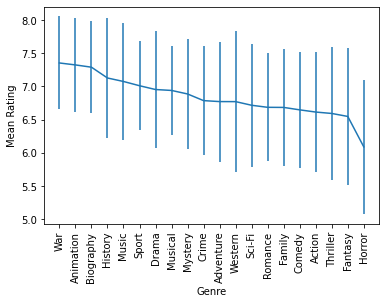

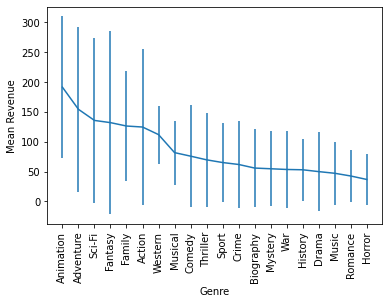

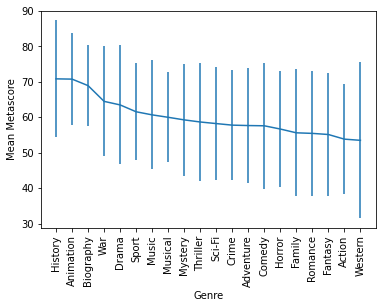

In [21]:
# Plot some ordered line plots w stdevs for each metric
plt.errorbar(stat_df.index, stat_df['mean_rating'], stat_df['deviation_rating'])
plt.xlabel("Genre")
plt.ylabel("Mean Rating")
plt.xticks(rotation=90)
plt.show()

stat_df.sort_values(inplace=True, by='mean_revenue', ascending=False)

plt.errorbar(stat_df.index, stat_df['mean_revenue'], stat_df['deviation_revenue'])
plt.xlabel("Genre")
plt.ylabel("Mean Revenue")
plt.xticks(rotation=90)
plt.show()

stat_df.sort_values(inplace=True, by='mean_metascore', ascending=False)

plt.errorbar(stat_df.index, stat_df['mean_metascore'], stat_df['deviation_metascore'])
plt.xlabel("Genre")
plt.ylabel("Mean Metascore")
plt.xticks(rotation=90)
plt.show()

Slope: 25.9, y-intercept: -91.6, R^2: 0.047


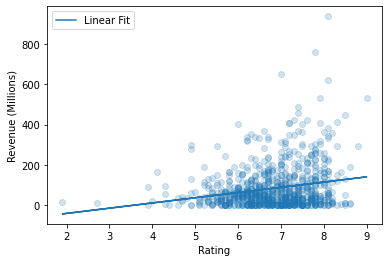

Slope: 13.0, y-intercept: -29.0, R^2: 0.453


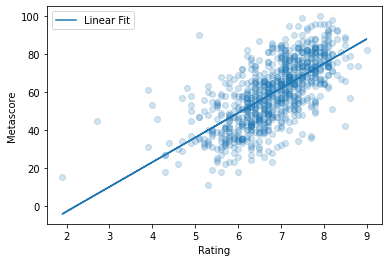

Slope: 0.9, y-intercept: 32.3, R^2: 0.02


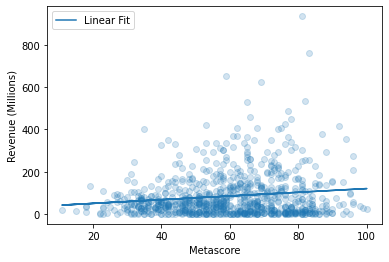

In [32]:
### Scatter plots with trend lines and R^2 values

df.dropna(inplace = True) #remove entries with missing values

for axes in [("Rating", "Revenue (Millions)"), ("Rating", "Metascore"), ("Metascore", "Revenue (Millions)")]:
  # Scatter plot
  plt.scatter(df[axes[0]], df[axes[1]], alpha=0.2)

  # Linear fit
  p = np.polyfit(df[axes[0]], df[axes[1]], 1)
  bestfit = np.polyval(p, df[axes[0]])
  plt.plot(df[axes[0]], bestfit, label='Linear Fit')
  R2 = np.corrcoef(df[axes[0]], df[axes[1]])[0,1]**2

  print(f'Slope: {np.round(p[0],1)}, y-intercept: {np.round(p[1],1)}, R^2: {np.round(R2,3)}')

  plt.xlabel(axes[0])
  plt.ylabel(axes[1])
  plt.legend()
  plt.show()

# More Advanced Tutorials
Free
* [EdX - Python for Data Science](https://www.edx.org/course/python-for-data-science-2)
* [EdX - Probability and Statistics in Data Science](https://www.edx.org/course/probability-and-statistics-in-data-science-using-p)
* https://towardsdatascience.com/top-9-data-science-projects-for-a-beginner-in-2020-26eb7d42b116
* https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition/
* https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_ecosystem.htm
* https://analyticsindiamag.com/popular-data-science-projects-for-aspiring-data-scientists/


Paid
* [DataCamp - Intro to Data Science in Python](https://www.datacamp.com/courses/introduction-to-data-science-in-python)
* [DataCamp - Supervised Learning with scikit-learn](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn)

In [ ]:
np.polyfit